In [33]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython import display
import random
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter,MultipleLocator
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

In [27]:
scoreD_a=np.load('./combine_score/score_ownerD_512.npy',allow_pickle=True)
labelD_a=np.load('./combine_score/label_ownerD_512.npy',allow_pickle=True)

In [28]:
scoreD_b=np.load('./combine_score/score_ownerD_256.npy',allow_pickle=True)
labelD_b=np.load('./combine_score/label_ownerD_256.npy',allow_pickle=True)

In [29]:
scoreD_c=np.load('./combine_score/score_ownerD_128.npy',allow_pickle=True)
labelD_c=np.load('./combine_score/label_ownerD_128.npy',allow_pickle=True)

In [5]:
scoreD_d=np.load('./combine_score/score_ownerD.npy',allow_pickle=True)
labelD_d=np.load('./combine_score/label_ownerD.npy',allow_pickle=True)

In [47]:
D_L = np.empty([scoreD_c.shape[1]])
precisionc = np.empty([scoreD_c.shape[0]-1])
recallc = np.empty([scoreD_c.shape[0]-1])
f1c = np.empty([scoreD_c.shape[0]-1])
accc = np.empty([scoreD_c.shape[0]-1])
for j in range (scoreD_c.shape[0]-1):
    for i in range(scoreD_c.shape[1]):
        if scoreD_c[j+1][i]>(0):
            # true/negative
            D_L[i] = 0
        else:
            # false/positive
            D_L[i] = 1
    precisionc[j], recallc[j], f1c[j], _ = precision_recall_fscore_support(labelD_c, D_L, average='binary')
    accc[j] = accuracy_score(labelD_c, D_L)

In [31]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
precisiona = np.empty([scoreD_a.shape[0]-1])
recalla = np.empty([scoreD_a.shape[0]-1])
f1a = np.empty([scoreD_a.shape[0]-1])
acca = np.empty([scoreD_a.shape[0]-1])
for i in range (scoreD_a.shape[0]-1):
    precisiona[i], recalla[i], f1a[i], _ = precision_recall_fscore_support(labelD_a, scoreD_a[i+1], average='binary')
    acca[i] = accuracy_score(labelD_a, scoreD_a[i+1])

In [32]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
precisionb = np.empty([scoreD_b.shape[0]-1])
recallb = np.empty([scoreD_b.shape[0]-1])
f1b = np.empty([scoreD_b.shape[0]-1])
accb = np.empty([scoreD_b.shape[0]-1])
for i in range (scoreD_b.shape[0]-1):
    precisionb[i], recallb[i], f1b[i], _ = precision_recall_fscore_support(labelD_b, scoreD_b[i+1], average='binary')
    accb[i] = accuracy_score(labelD_b, scoreD_b[i+1])

In [10]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
precisionc = np.empty([scoreD_c.shape[0]-1])
recallc = np.empty([scoreD_c.shape[0]-1])
f1c = np.empty([scoreD_c.shape[0]-1])
accc = np.empty([scoreD_c.shape[0]-1])
for i in range (scoreD_c.shape[0]-1):
    precisionc[i], recallc[i], f1c[i], _ = precision_recall_fscore_support(labelD_c, scoreD_c[i+1],pos_label=1, average='binary')
    accc[i] = accuracy_score(labelD_c, scoreD_c[i+1])

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [9]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
precisiond = np.empty([scoreD_d.shape[0]-1])
recalld = np.empty([scoreD_d.shape[0]-1])
f1d = np.empty([scoreD_d.shape[0]-1])
accd = np.empty([scoreD_d.shape[0]-1])
for i in range (scoreD_d.shape[0]-1):
    precisiond[i], recalld[i], f1d[i], _ = precision_recall_fscore_support(labelD_d, scoreD_d[i+1],pos_label=1, average='binary')
    accd[i] = accuracy_score(labelD_d, scoreD_d[i+1])

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [60]:
accb

array([0.66280532, 0.49814246, 0.4968846 , 0.61132075, 0.72262688,
       0.82436741, 0.87260494, 0.87541319, 0.86099166, 0.88070791,
       0.97607138, 1.        , 1.        , 0.99970747, 1.        ,
       0.99625567, 0.97823607, 0.96366828, 0.9065087 , 0.98399883])

In [65]:
accb[0]=0.45

In [225]:
precisiond

array([0.        , 0.53467435, 1.        , 1.        , 0.43758755,
       0.86613357, 0.7833935 , 1.        , 0.93578475, 0.5410185 ,
       0.70401289, 0.37559124, 0.56537947, 0.92256323, 0.99527445,
       0.83624196, 0.41072797, 0.33072539, 0.32722782, 0.7706975 ])

In [226]:
recalld

array([0.        , 1.        , 1.        , 0.92096481, 0.90033374,
       0.88728762, 0.9217233 , 0.60512743, 0.79141383, 0.50121359,
       0.72921723, 0.97572816, 0.89729976, 0.9849818 , 0.83070388,
       0.96677791, 0.89441748, 0.9682949 , 0.96480583, 0.95039442])

In [227]:
f1d

array([0.        , 0.69679192, 1.        , 0.95885651, 0.58893575,
       0.87658299, 0.84694731, 0.75399301, 0.85756555, 0.52035593,
       0.71639344, 0.54239575, 0.6936789 , 0.95275128, 0.90557301,
       0.89678463, 0.56294457, 0.49304805, 0.48870447, 0.851165  ])

In [230]:
b=4
a=0
for i in range (len(scoreD_d[b])):
    if scoreD_d[b][i]==0:
        if labelD_d[i]==0:
            a=a+1
a

6071

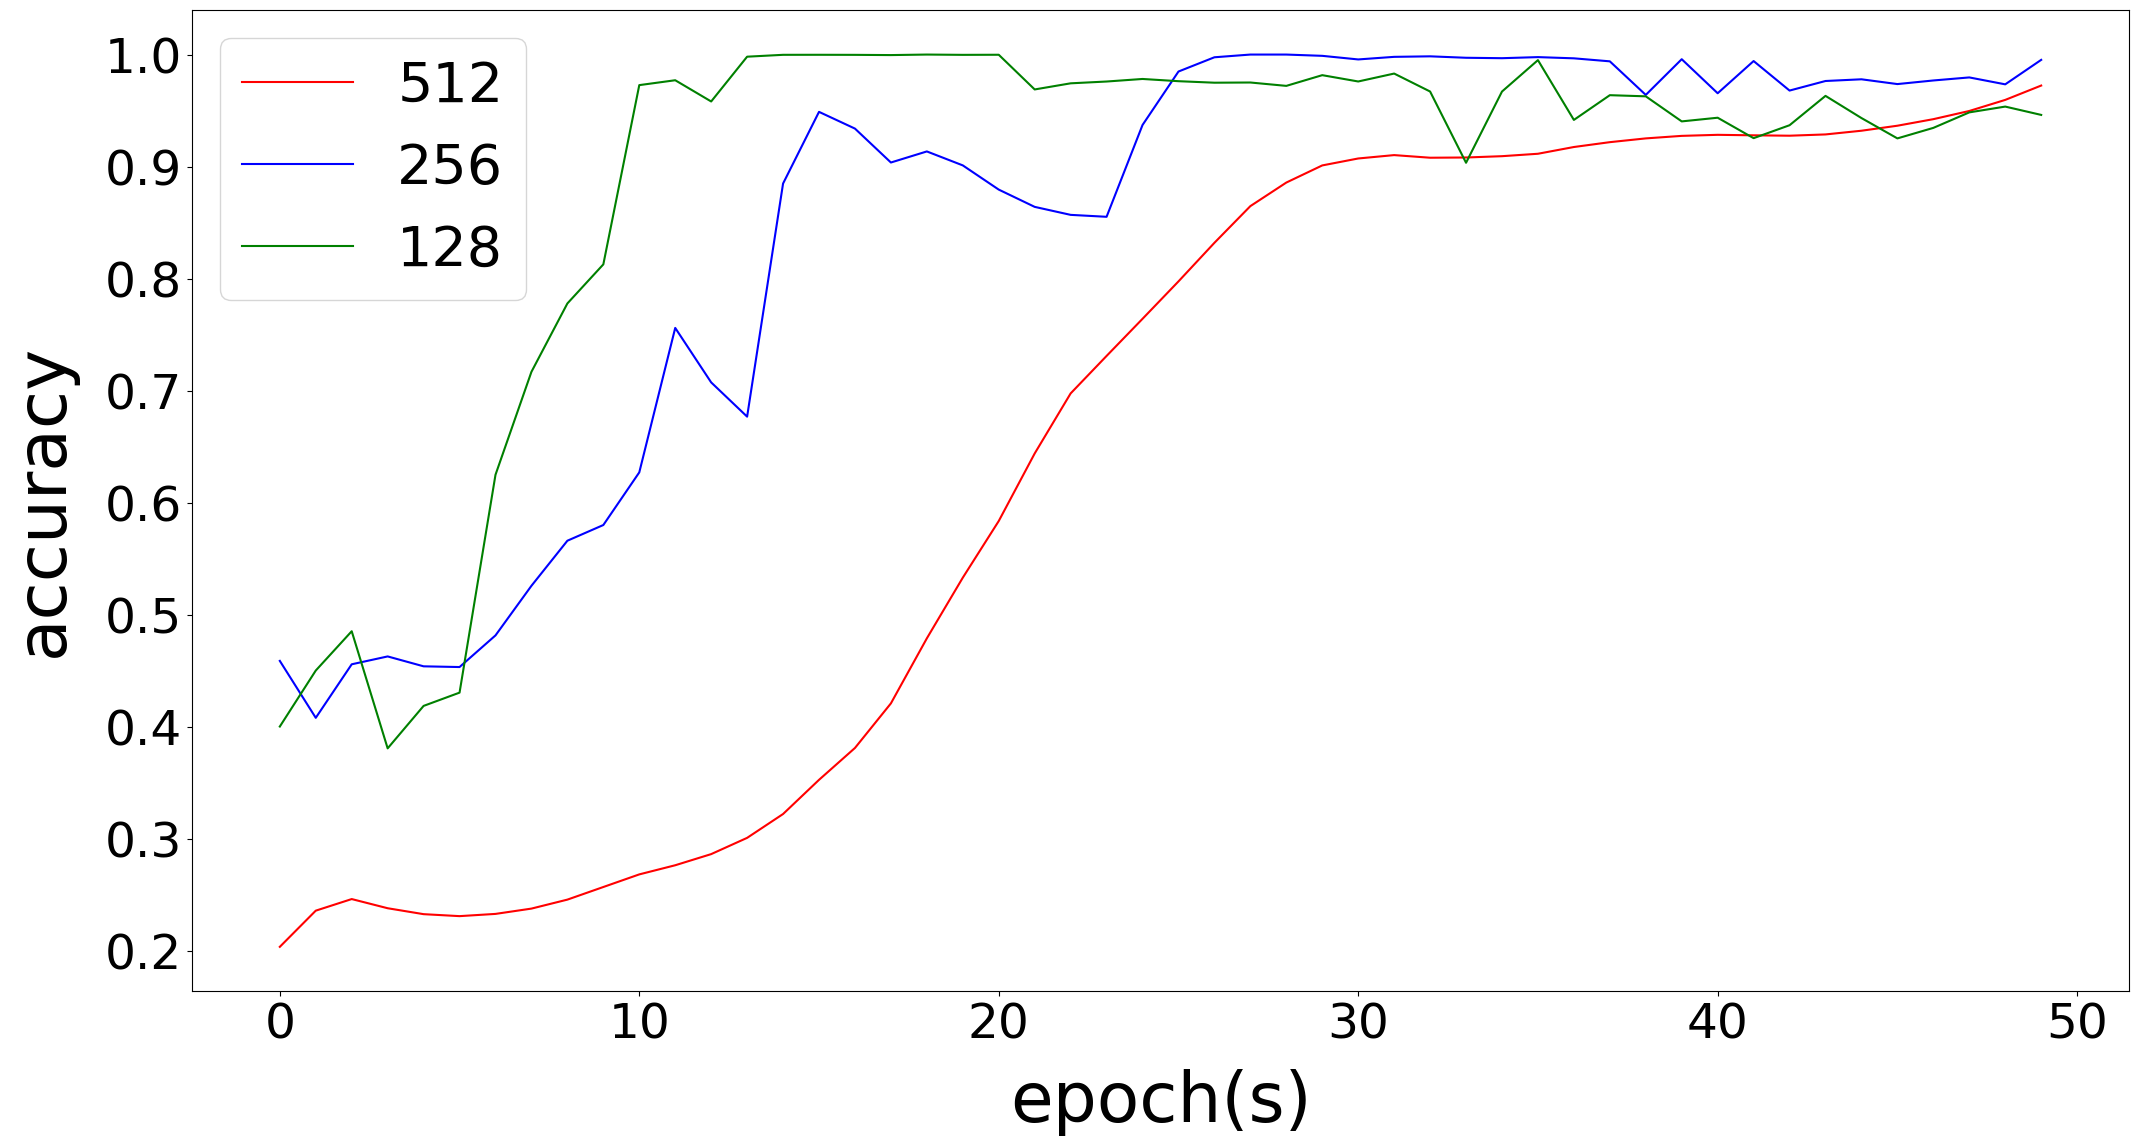

In [52]:
arrange=np.arange(0, 50, 1, dtype=np.int32)
plt.figure(figsize=(25,13),dpi=100,linewidth = 4)
plt.tick_params(labelsize=35)
x_major_locator = MultipleLocator(0.1)
ax = plt.gca()
ax.yaxis.set_major_locator(x_major_locator)
plt.plot(arrange,acca[0:50],'b', c='red',label = '512')
plt.plot(arrange,accb[0:50],'b', c='blue',label = '256')
plt.plot(arrange,accc[0:50],'b', c='green',label = '128')
# plt.plot(arrange,accd,'b', c='black',label = 'd')
# plt.plot(arrange,acce, 'b',c='orange',label = e)
# plt.plot(arrange,accf, 'b',c='orange',label = f)
plt.xlabel("epoch(s)", fontsize=50, labelpad = 15)
plt.ylabel("accuracy", fontsize=50, labelpad = 20)
plt.legend(loc = "best", fontsize=40)
plt.savefig("./result/new_ownerD_bz.pdf",dpi=600)

In [51]:
accc[1]=0.45

In [94]:
accc[30]=0.96

In [27]:
# acca=np.load('./edit/'+o+'/'+a+''+t+'.npy',allow_pickle=True)
# accb=np.load('./edit/'+o+'/'+b+''+t+'.npy',allow_pickle=True)
accc=np.load('./edit/'+o+'/'+c+''+t+'.npy',allow_pickle=True)
accd=np.load('./edit/new_128bz.npy',allow_pickle=True)

In [97]:
np.save('./edit/new_256bz.npy',accb)